In [39]:
## Imports 
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from matplotlib.pylab import rcParams
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [32]:
df_penguins=pd.read_csv("penguins.csv")
# Step 2: Preprocess the data (handle missing values)
df_penguins.dropna(inplace=True)

le = LabelEncoder()
df_penguins.species = le.fit_transform(df_penguins.species)
df_penguins.species.unique()

array([0, 2, 1])

In [92]:
# Encoding categorical vairables 
df1 = pd.get_dummies(df_penguins[['island', 'sex']],
                    prefix = ['island', 'sex'], drop_first=True )
df2 = pd.concat([df_penguins, df1], axis=1)
df2.drop(['island', 'sex','rowid'], axis = 1, inplace = True)
df2.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_Dream,island_Torgersen,sex_male
0,0,39.1,18.7,181.0,3750.0,2007,False,True,True
1,0,39.5,17.4,186.0,3800.0,2007,False,True,False
2,0,40.3,18.0,195.0,3250.0,2007,False,True,False
4,0,36.7,19.3,193.0,3450.0,2007,False,True,False
5,0,39.3,20.6,190.0,3650.0,2007,False,True,True


In [93]:
# Defining the x and y variables
X = df2.drop('species', axis= 1)
y = df2['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state= 100) 
# Initalization of the decisiontreeclassifier
dtc = DecisionTreeClassifier()
# fitting on model
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

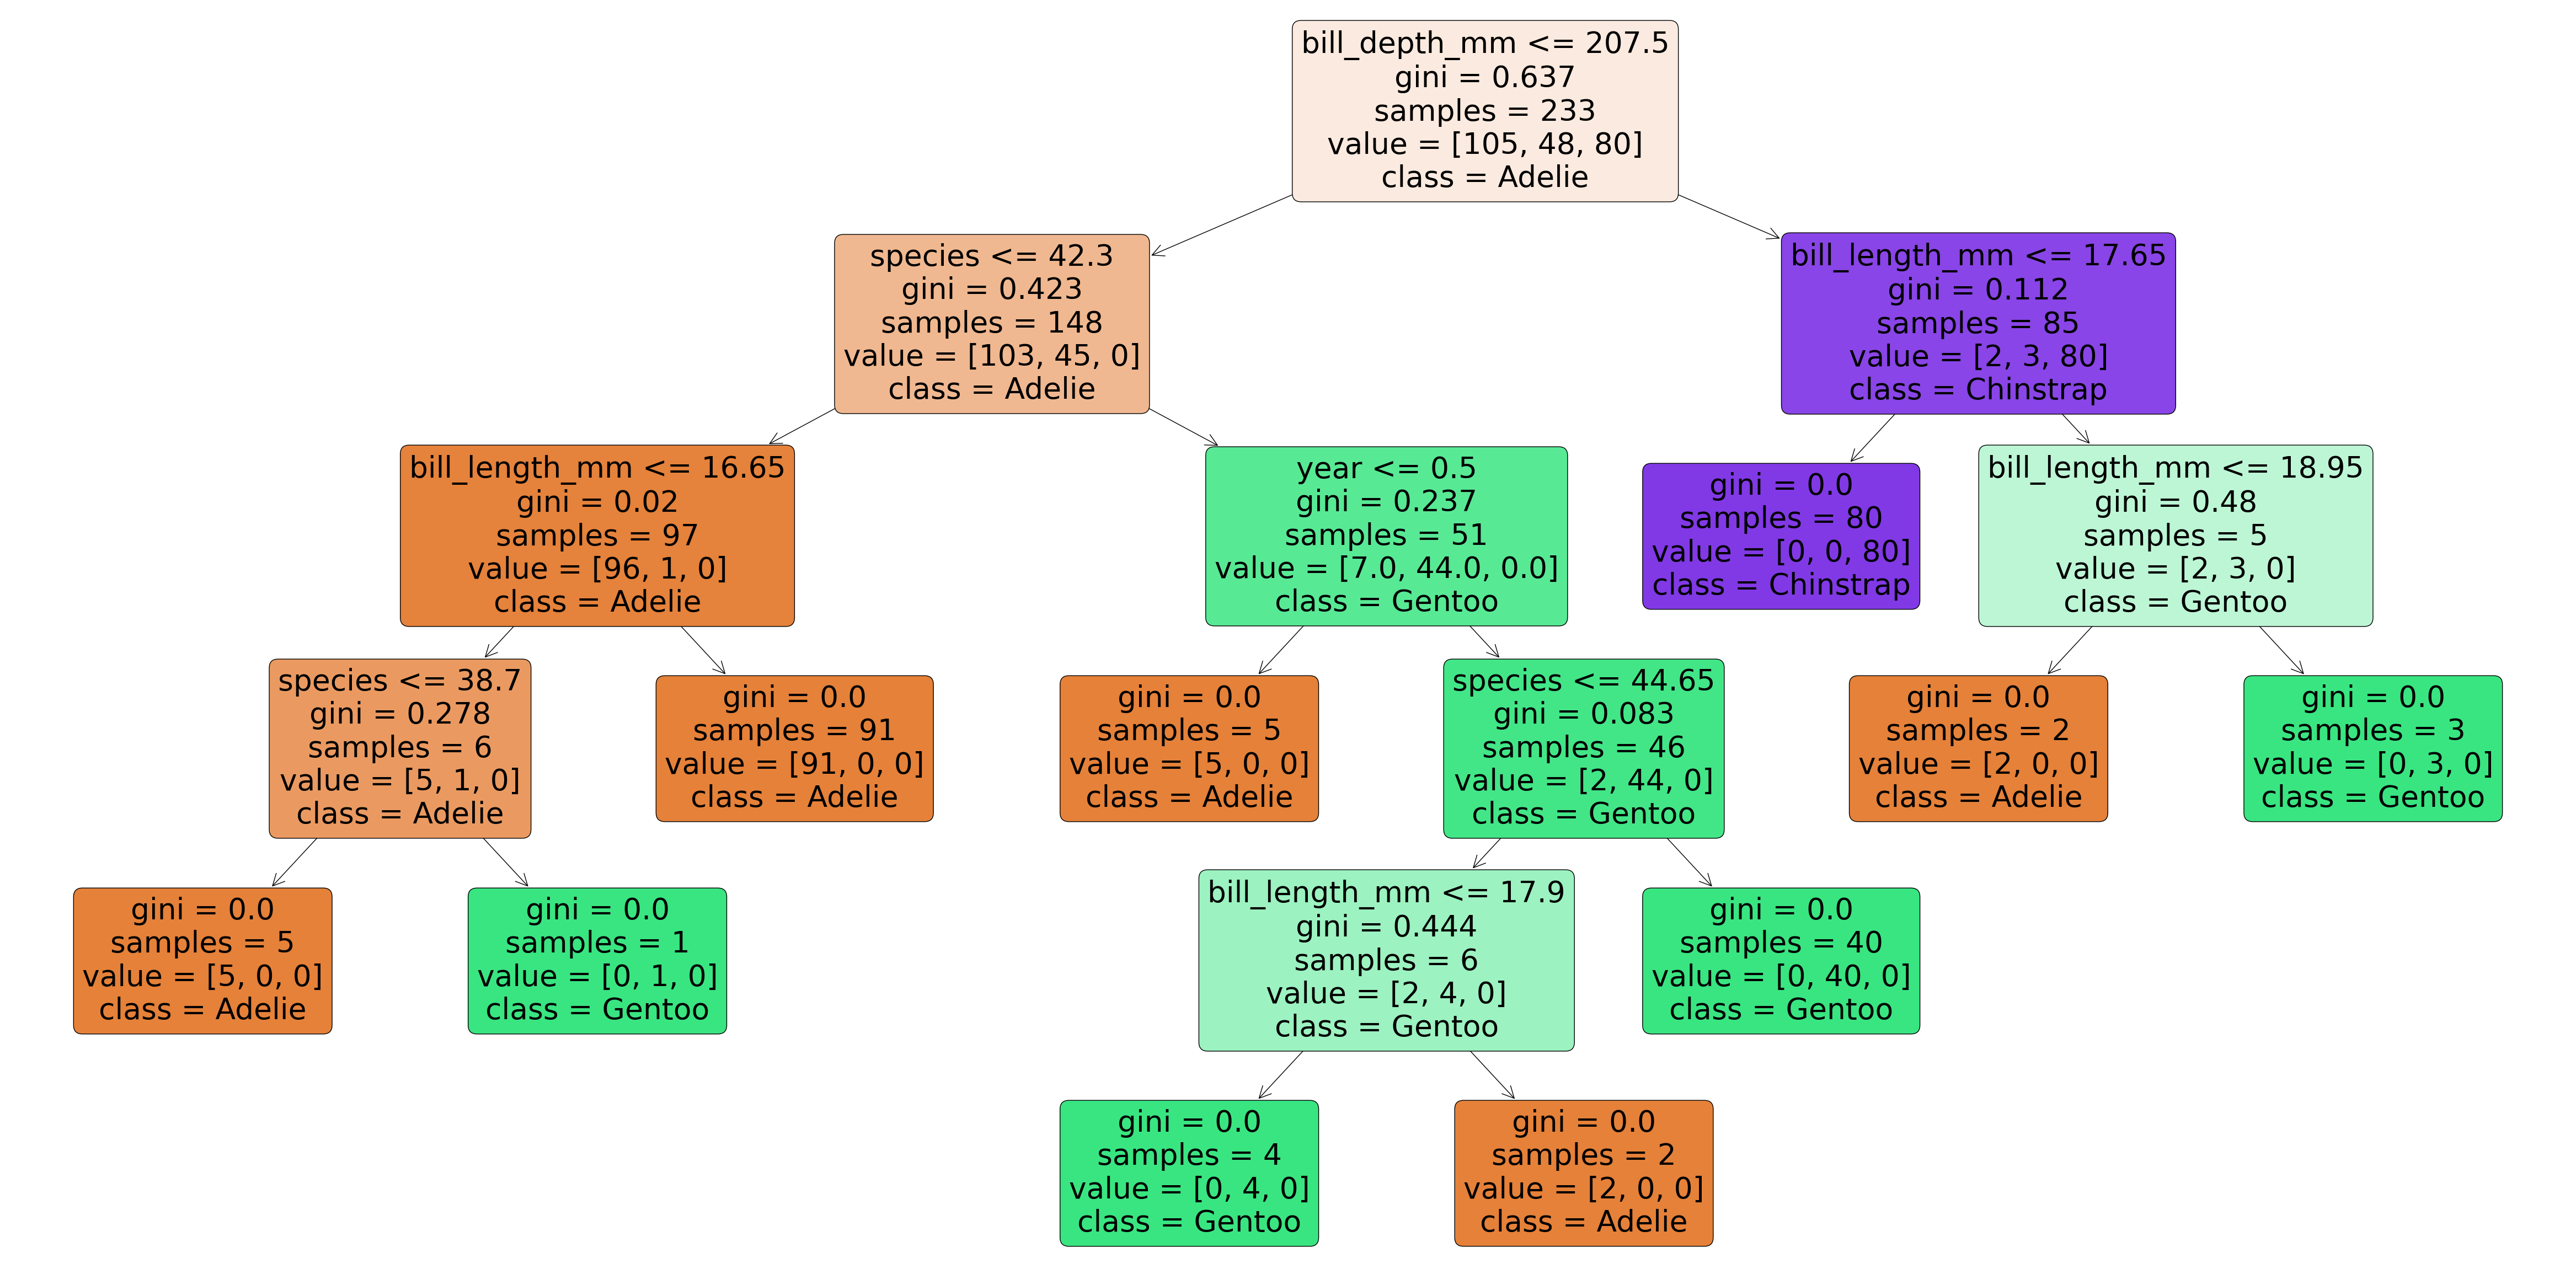

In [94]:
# Building initial model
plt.figure(figsize=(60, 30))
plot_tree(dtc, feature_names= df2.columns, class_names= ['Adelie','Gentoo','Chinstrap'], filled= True, rounded = True )
plt.show()

In [95]:
# Model prediction
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)
# checking accuracy on train data

print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

1.0


array([[105,   0,   0],
       [  0,  48,   0],
       [  0,   0,  80]], dtype=int64)

In [96]:
# checking accuracy on test data
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.97


array([[41,  0,  0],
       [ 1, 19,  0],
       [ 2,  0, 37]], dtype=int64)

In [97]:
## Hyperparameter turning 
# Creating the user defined function for tree plotting 
def get_decision_tree(data):
    plt.figure(figsize=(60,30))
    plot_tree(data, feature_names= df2.columns, class_names= ['Adelie','Gentoo','Chinstrap'], filled= True, rounded = True)
    plt.show()
# Creating the user defined function for model evaluation
def eval_mat(data):
    y_train_pred = data.predict(X_train)
    y_test_pred = data.predict(X_test)
    accuracytr= accuracy_score(y_train, y_train_pred)
    accuracytest = accuracy_score(y_test, y_test_pred)
    print(f"Train Performance={accuracytr}, Test performance = {accuracytest}")


In [120]:
# hyperparametr tuning
dt = DecisionTreeClassifier(random_state=100)
# Defining hyperparameters
params = {
    'max_depth': [3,5],
    'min_samples_leaf': [5,10,15,20,25],
    'criterion': ['gini', 'entropy']   
}

# creating model through GridSearchCV
grid_search= GridSearchCV(estimator= dt, param_grid = params, cv= 4, n_jobs=-1, verbose=1, scoring= 'accuracy')
# model fitting
grid_search.fit(X_train, y_train)
# Checking out the results

grid_search.cv_results_

Fitting 4 folds for each of 20 candidates, totalling 80 fits


{'mean_fit_time': array([0.00275213, 0.00300801, 0.00355476, 0.0033102 , 0.0029422 ,
        0.00341082, 0.0041334 , 0.00421965, 0.00421101, 0.00393897,
        0.00403422, 0.00416368, 0.00330925, 0.00445658, 0.00318801,
        0.00346702, 0.00287324, 0.00319993, 0.00200939, 0.00221026]),
 'std_fit_time': array([8.29006999e-04, 1.00896087e-03, 4.12060230e-04, 4.13145725e-04,
        7.12461228e-04, 4.28985755e-04, 7.79446972e-04, 2.50339508e-06,
        4.64707211e-04, 2.57542359e-04, 3.16009881e-04, 4.25337789e-04,
        2.36887366e-04, 8.60077475e-04, 2.12315895e-04, 6.51399709e-04,
        2.72407984e-04, 5.11572454e-04, 3.53306772e-04, 5.39767987e-04]),
 'mean_score_time': array([0.00210106, 0.00230867, 0.00172406, 0.00272244, 0.00215864,
        0.00254536, 0.00236738, 0.00300598, 0.00258845, 0.00239885,
        0.00255769, 0.00282699, 0.00254154, 0.00224131, 0.00301099,
        0.00191516, 0.00224978, 0.0016306 , 0.00113147, 0.00201595]),
 'std_score_time': array([2.02166900e-

In [121]:
# Creating the dataframe with result
cv_df = pd.DataFrame(grid_search.cv_results_)
cv_df.shape
# Best parameters
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=100)

In [122]:
# Best score
grid_search.best_score_

0.9484219754529515

In [123]:
# best parameters
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5}

In [124]:
# Taking out the best parameters for the model building
dt_best = grid_search.best_estimator_

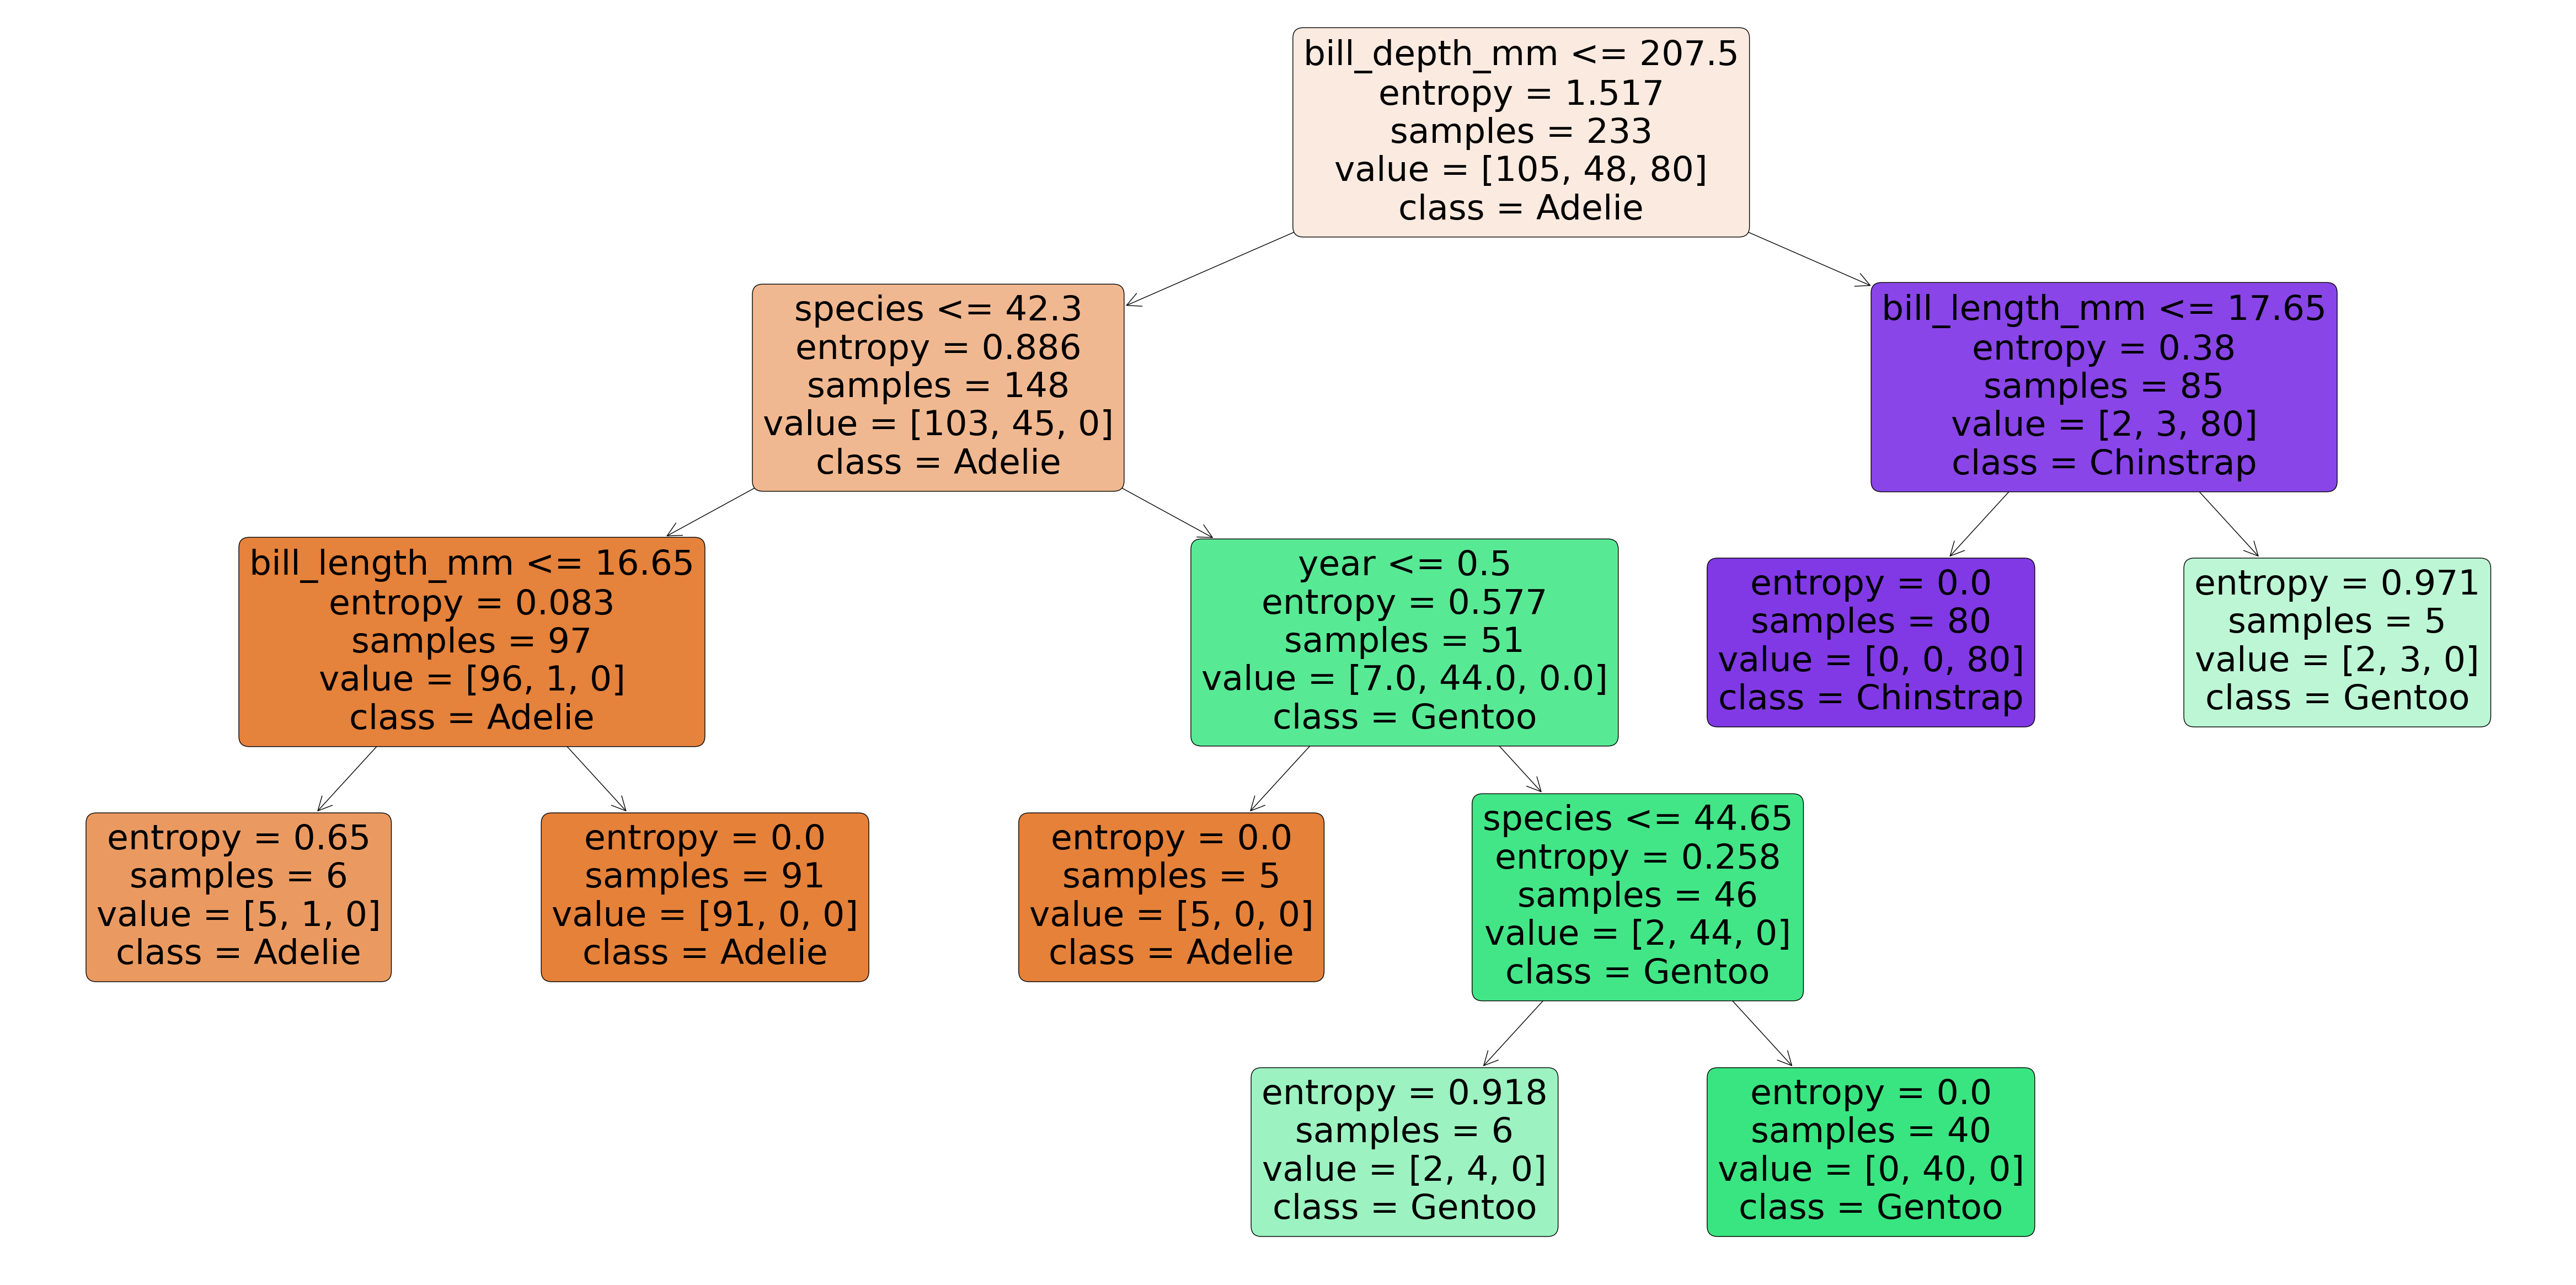

In [125]:
# Draw the decision tree
get_decision_tree(dt_best)

In [126]:
# Checking for the accuracy score
eval_mat(dt_best)

Train Performance=0.9785407725321889, Test performance = 0.98
